In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
denorm_df = pd.merge(city_df, ride_df, on="city")

# Display the data table for preview
denorm_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
# tried to create functions to do repeatable stuff but couldnt get the pass by value to return the data out of the function ;()
def get_citytype_data( citytype_df,summary_df):
    citytype_df.head()
    denorm_groupby_city_df = citytype_df.groupby("city")

    average_fare_per_city = denorm_groupby_city_df["fare"].mean()
    ride_count_per_city = denorm_groupby_city_df["fare"].count()
    city_types = denorm_groupby_city_df["type"].max()
    driver_count_per_city = denorm_groupby_city_df["driver_count"].max()
    
    summary_df = pd.DataFrame({"AverageFare": average_fare_per_city, 
                                "RideCount" : ride_count_per_city, 
                                "DriverCount" : driver_count_per_city,
                                "Type" : city_types})
    return summary_df;
    



In [3]:
rural_df = denorm_df.loc[denorm_df["type"] == "Rural", :]
urban_df = denorm_df.loc[denorm_df["type"] == "Urban", :]
suburban_df = denorm_df.loc[denorm_df["type"] == "Suburban", :]



In [4]:
#calc the rural data
rural_groupby_city_df = rural_df.groupby("city")

average_fare_per_city = rural_groupby_city_df["fare"].mean()
ride_count_per_city = rural_groupby_city_df["fare"].count()

city_types = rural_groupby_city_df["type"].max()
driver_count_per_city = rural_groupby_city_df["driver_count"].max()

rural_summary_df = pd.DataFrame({"AverageFare": average_fare_per_city, 
                                "RideCount" : ride_count_per_city, 
                                "DriverCount" : driver_count_per_city,
                                "Type" : city_types})


In [5]:
#calc the urban data
urban_groupby_city_df = urban_df.groupby("city")

average_fare_per_city = urban_groupby_city_df["fare"].mean()
ride_count_per_city = urban_groupby_city_df["fare"].count()
city_types = urban_groupby_city_df["type"].max()
driver_count_per_city = urban_groupby_city_df["driver_count"].max()

urban_summary_df = pd.DataFrame({"AverageFare": average_fare_per_city, 
                                "RideCount" : ride_count_per_city, 
                                "DriverCount" : driver_count_per_city,
                                "Type" : city_types})
urban_summary_df.head()

,AverageFare,RideCount,DriverCount,Type
city,,,,
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Carriemouth,28.314444,27,52,Urban
Christopherfurt,24.501852,27,41,Urban
Deanville,25.842632,19,49,Urban


In [6]:
#calc the suburban data
suburban_groupby_city_df = suburban_df.groupby("city")

average_fare_per_city = suburban_groupby_city_df["fare"].mean()
ride_count_per_city = suburban_groupby_city_df["fare"].count()
city_types = suburban_groupby_city_df["type"].max()
driver_count_per_city = suburban_groupby_city_df["driver_count"].max()

suburban_summary_df = pd.DataFrame({"AverageFare": average_fare_per_city, 
                                "RideCount" : ride_count_per_city, 
                                "DriverCount" : driver_count_per_city,
                                "Type" : city_types})
suburban_summary_df.head()

,AverageFare,RideCount,DriverCount,Type
city,,,,
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Brandonfort,35.437368,19,10,Suburban
Colemanland,30.894545,22,23,Suburban
Davidfurt,31.995882,17,23,Suburban


In [7]:
denorm_groupby_city_df = denorm_df.groupby("city")

average_fare_per_city = denorm_groupby_city_df["fare"].mean()
ride_count_per_city = denorm_groupby_city_df["fare"].count()
city_types = denorm_groupby_city_df["type"].max()
driver_count_per_city = denorm_groupby_city_df["driver_count"].max()



city_summary_df = pd.DataFrame({"AverageFare": average_fare_per_city, 
                                "RideCount" : ride_count_per_city, 
                                "DriverCount" : driver_count_per_city,
                                "Type" : city_types})



In [8]:
# create summary table with: city, avg fare, total rides, city_type

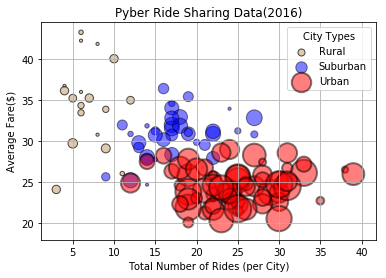

<Figure size 432x288 with 0 Axes>

In [9]:
sr_list = rural_summary_df["DriverCount"] * 10
su_list = urban_summary_df["DriverCount"] * 10
ss_list = suburban_summary_df["DriverCount"] * 10
xrlist = rural_summary_df["RideCount"]
yrlist = rural_summary_df["AverageFare"]
xulist = urban_summary_df["RideCount"]
yulist = urban_summary_df["AverageFare"]
xslist = suburban_summary_df["RideCount"]
yslist = suburban_summary_df["AverageFare"]



plt.scatter( x=xrlist, y=yrlist, color="tan", edgecolors="black", s=sr_list, label="Rural",alpha=.7)
plt.scatter( x=xslist, y=yslist, color="blue", edgecolors="black", s=ss_list,label="Suburban", alpha=.5)
plt.scatter( x=xulist, y=yulist, color="red",edgecolors="black", s=su_list,label="Urban", alpha=.5,linewidths=2)
plt.legend(loc="upper right", title="City Types")
plt.grid(True)
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare($)")
plt.title("Pyber Ride Sharing Data(2016)")
             

plt.show()

plt.savefig("bubble.png")



## Bubble Plot of Ride Sharing Data

In [10]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [11]:
# Show plot
plt.show()

## Total Fares by City Type

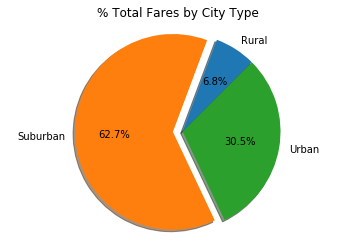

<Figure size 432x288 with 0 Axes>

In [12]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure
total_rural_fares = rural_df["fare"].sum()
total_urban_fares = urban_df["fare"].sum()
total_suburban_fares = suburban_df["fare"].sum()

total_fares = total_rural_fares + total_urban_fares + total_suburban_fares

rural_pct = total_rural_fares / total_fares * 100
urban_pct = total_urban_fares / total_fares * 100
suburban_pct = total_suburban_fares / total_fares * 100


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Rural', 'Suburban', 'Urban'
sizes = [rural_pct, urban_pct, suburban_pct]

explode = (0, 0.1, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("% Total Fares by City Type")
plt.show()
plt.savefig("fares_pie.png")

In [13]:
# Show Figure
plt.show()

## Total Rides by City Type

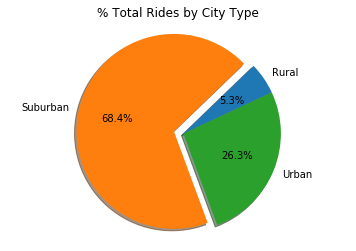

<Figure size 432x288 with 0 Axes>

In [14]:
# Calculate Ride Percents
total_rural_rides = rural_df["fare"].count()
total_urban_rides = urban_df["fare"].count()
total_suburban_rides = suburban_df["fare"].count()

total_rides = total_rural_rides + total_urban_rides + total_suburban_rides

ruralrides_pct = total_rural_rides / total_rides * 100
urbanrides_pct = total_urban_rides / total_rides * 100
suburbanrides_pct = total_suburban_rides / total_rides * 100


# Pie chart, where the slices will be ordered and plotted counter-clockwise:

ridessizes = [ruralrides_pct, urbanrides_pct, suburbanrides_pct]

ridesexplode = (0, 0.1, 0) 

fig1_rides, ax1_rides = plt.subplots()
ax1_rides.pie(ridessizes, explode=ridesexplode,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=25)
ax1_rides.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("% Total Rides by City Type")
plt.show()
plt.savefig("rides_pie.png")
# Build Pie Chart

# Save Figure


In [15]:
# Show Figure
plt.show()

## Total Drivers by City Type

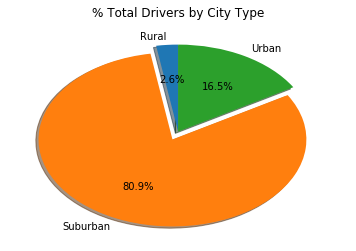

<Figure size 432x288 with 0 Axes>

In [16]:
# Calculate Driver Percents
total_rural_drivers = rural_summary_df["DriverCount"].sum()
total_urban_drivers = urban_summary_df["DriverCount"].sum()
total_suburban_drivers = suburban_summary_df["DriverCount"].sum()

total_drivers = total_rural_drivers + total_urban_drivers + total_suburban_drivers

ruraldrivers_pct = total_rural_drivers / total_drivers * 100
urbandrivers_pct = total_urban_drivers / total_drivers* 100
suburbandrivers_pct = total_suburban_drivers / total_drivers * 100


# Pie chart, where the slices will be ordered and plotted counter-clockwise:

drivers_sizes = [ruraldrivers_pct, urbandrivers_pct, suburbandrivers_pct]
driversexplode = (0, 0.1, 0) 

fig1_drivers, ax1_drivers = plt.subplots()
ax1_drivers.pie(drivers_sizes, explode=driversexplode,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1_rides.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("% Total Drivers by City Type")
plt.show()
plt.savefig("drivers_pie.png")
# Build Pie Charts

# Save Figure


In [17]:
# Show Figure
plt.show()